In [ ]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
# Load the data sets
X = np.load("/content/handsignX.npy")
y = np.load("/content/handsigny.npy")

In [ ]:
# Print the first element of X
print("The first element of X is:", X[0])

# Print the first and last elements of y
print("\nViewing first and last element of y")
print("The first element of y is:", y[0, 0])
print("The last element of y is:", y[-1, 0])

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [ ]:
#Dimension of X and y
print(f"The shape of X is: {X.shape}")
print(f"\nThe shape of y is: {y.shape}")



The shape of X is: (5000, 400)

The shape of y is: (5000, 1)


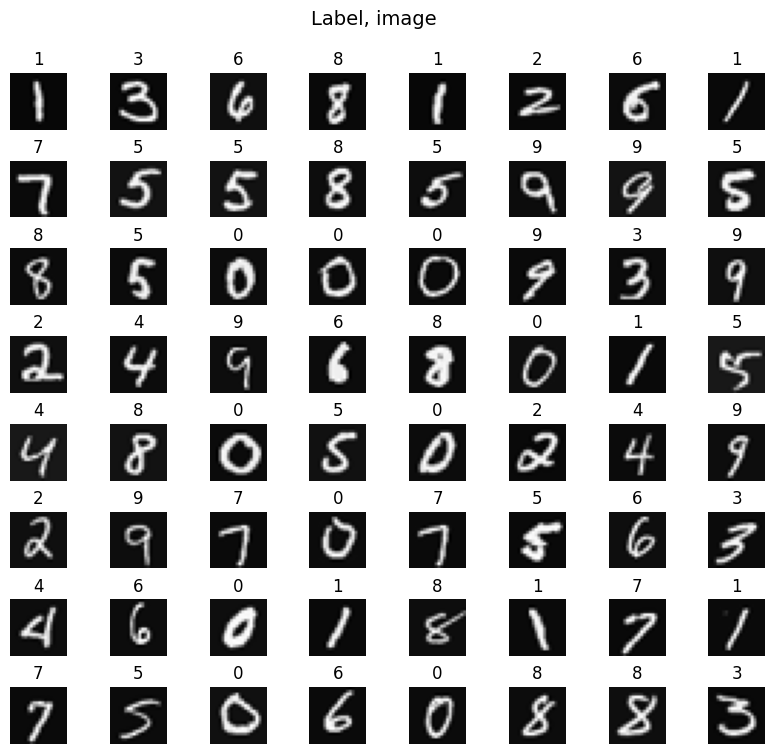

In [ ]:
# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Getting the shape of X
m, n = X.shape

# Creating subplots
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # [left, bottom, right, top]

# Iterating through each subplot
for i, ax in enumerate(axes.flat):
    # Selecting a random index
    random_index = np.random.randint(m)

    # Reshaping the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Displaying the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Displaying the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

# Adding a title to the entire figure
fig.suptitle("Label, image", fontsize=14)

# Showing the plot
plt.show()

In [ ]:
# Setting the random seed for reproducibility
tf.random.set_seed(1234)

# Creating a Sequential model
model = Sequential([
    tf.keras.Input(shape=(400,)),  # Input layer with shape (400,)
    Dense(units=25, activation='relu'),  # Hidden layer with 25 units and ReLU activation
    Dense(units=15, activation='relu'),  # Hidden layer with 15 units and ReLU activation
    Dense(units=10, activation='linear')  # Output layer with 10 units and linear activation
], name='sequential_model')  # Naming the model as 'sequential_model'

In [ ]:
model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
[layer1, layer2, layer3] = model.layers  # Extracting layers from the model

# Getting weights and biases of each layer
W1, b1 = layer1.get_weights()  # Weights and biases of the first layer
W2, b2 = layer2.get_weights()  # Weights and biases of the second layer
W3, b3 = layer3.get_weights()  # Weights and biases of the third layer

# Printing shapes of weights and biases
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [ ]:
#compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# model history with 40 epochs
history = model.fit(
    X, y,
    epochs=40
)


Epoch 1/40
157/157 [==============================] - 3s 4ms/step - loss: 1.7134 - accuracy: 0.4084
Epoch 2/40
157/157 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.8240
Epoch 3/40
157/157 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8846
Epoch 4/40
157/157 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.9088
Epoch 5/40
157/157 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.9164
Epoch 6/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.9244
Epoch 7/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.9302
Epoch 8/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9350
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9374
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9440

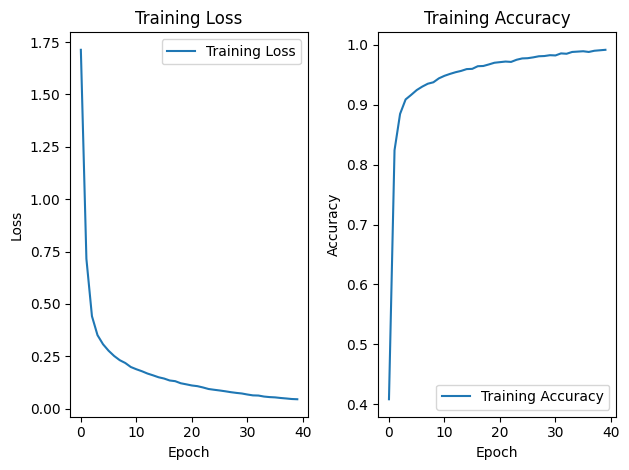

In [ ]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get the image of index 1015 from the dataset
image_of_two = X[1015]
# Make predictions on the reshaped image using the trained model
prediction = model.predict(image_of_two.reshape(1, 400))
# Print the predictions
print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 123ms/step
 predicting a Two: 
[[-12.377154     0.43266377   3.5245454    1.2919878   -8.272767
   -7.84347     -8.516349    -0.8779888   -3.0258856  -11.43894   ]]
 Largest Prediction index: 2


In [ ]:
# Apply softmax to the prediction
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.0644923e-07 3.8938209e-02 8.5735977e-01 9.1955058e-02 6.4514197e-06
  9.9105282e-06 5.0567219e-06 1.0499453e-02 1.2255950e-03 2.7202185e-07]]
Total of predictions: 1.000


In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 18ms/step


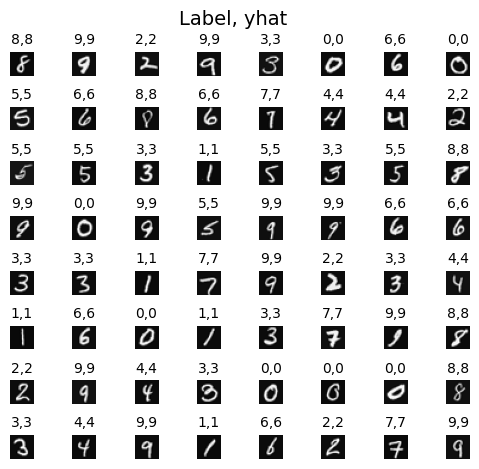

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()
